# Laboratorio de regresión logística

|                |   |
:----------------|---|
| **Nombre**     | Camila Garcia Ornelas  |
| **Fecha**      |  6 de octubre, 2025 |
| **Expediente** |  749725 | 

La regresión logística es una herramienta utilizada para predecir respuestas cualitativas. Al igual que la regresión lineal, es un método sencillo que sirve como un punto de partida para técnicas más avanzadas. Por ejemplo, lo que se conoce como *redes neuronales* o *red de perceptrones multicapa* no es más que una estructura de regresiones logísticas que se alimentan entre sí.

1. Descarga el archivo de créditos y carga los datos (Default.csv). Utiliza `pandas`.

In [109]:
import pandas as pd

In [4]:
archivo = "Default.csv"

In [6]:
df = pd.read_csv(archivo)

2. Utiliza el comando `obj.head()`, donde `obj` es el nombre que le diste a los datos del archivo.

In [9]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138950
3,No,No,529.250605,35704.493940
4,No,No,785.655883,38463.495880


In [15]:
df.head(10)

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138950
3,No,No,529.250605,35704.493940
4,No,No,785.655883,38463.495880
5,No,Yes,919.588531,7491.558572
6,No,No,825.513331,24905.226578
7,No,Yes,808.667504,17600.451340
8,No,No,1161.057854,37468.529290
9,No,No,0.000000,29275.268290


In [17]:
df.head(3)

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138950


El comando head arroja los primeras *n* líneas (por defecto 5) de los datos que están en el DataFrame.

3. Utiliza el comando `obj.describe()`.

In [19]:
df.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729275
max,2654.322576,73554.233500


In [21]:
df.columns.tolist()

['default', 'student', 'balance', 'income']

In [23]:
df.dtypes

default     object
student     object
balance    float64
income     float64
dtype: object

El comando describe toma las columnas que tienen datos numéricos y saca datos estadísticos comunes:
- *n*
- media
- desviación estándar
- valor mínimo
- primer cuartil
- mediana
- tercer cuartil
- valor máximo

3. Vistos estos datos, ¿qué columnas existen en el DataFrame? ¿Qué tipo de datos contienen?

En el DataFrame hay cuatro columnas: default, student, balance e income.

default y student son de tipo object (categóricas), mientras que balance e income son de tipo float64 (numéricas continuas).

Por ello, describe() resume solo balance e income; conviene convertir default y student a category para analizarlas mejor.

4. Configura el tipo de dato de las columnas `default` y `student` para cambiarlos a variables categóricas.

`data[columna] = data[columna].astype("category")`

In [26]:
df["default"] = df["default"].astype("category")

In [28]:
df["student"] = df["student"].astype("category")

In [30]:
df[["default", "student"]].dtypes

default    category
student    category
dtype: object

Imagina que trabajas en un banco y que se te entregan estos datos. Tu objetivo es crear un modelo que ayude a predecir si una persona que solicita un crédito lo va a pagar. Exploremos los datos un poco más antes de crear un modelo.

Veamos primero cómo es la distribución de los valores cuando una persona dejó de pagar y cuando siguió pagando. `Default` es el término utilizado para cuando una persona dejó de pagar.

5. Crea una gráfica de caja para las columnas `income` y `balance`, con los datos agrupados con la columna `default`. Utiliza el comando `obj.boxplot(column=____, by=_____)`

In [97]:
import matplotlib.pyplot as plt

Text(0.5, 0.98, 'Boxplot grouped by default')

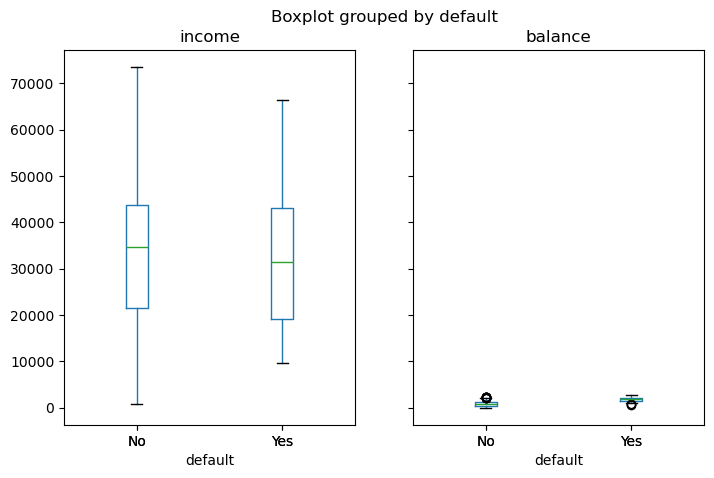

In [99]:
axes = df.boxplot(column=['income', 'balance'], by='default', figsize=(8,5), grid=False)
plt.suptitle('Boxplot grouped by default')

In [101]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

6. Crea una gráfica de dispersión donde el eje *x* sea la columna `balance` y el eje *y* la columna `income`. Utiliza el comando `obj.plot.scatter(x, y, c="default", colormap="PiYG_r", alpha=0.5)`.

In [57]:
if hasattr(df['default'], 'cat'):
    cvals = df['default'].cat.codes
else:
    cvals = df['default'].map({'No': 0, 'Yes': 1})

In [93]:
import matplotlib.pyplot as plt

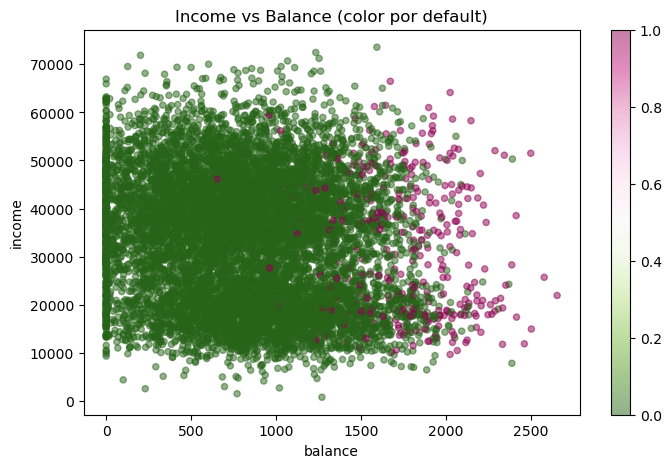

In [95]:
ax = df.plot.scatter(
    x='balance',
    y='income',
    c=cvals,
    colormap='PiYG_r',
    alpha=0.5,
    figsize=(8,5)
)
ax.set_title('Income vs Balance (color por default)')
ax.set_xlabel('balance')
ax.set_ylabel('income')
plt.show()

La regresión (lineal o logística) se usa para encontrar una línea que ajuste los datos para tomar una decisión. La línea que buscamos en regresión logística es aquella que nos ayude a separar las diferentes categorías. 

<img style="float: left; " src="https://www.baeldung.com/wp-content/uploads/sites/4/2023/10/decision_boundary_curve.jpg" width="400px" />


## Regresión logística simple

Creemos un modelo simple donde sólo utilizamos una de los factores para predecir una respuesta. Quiero conocer la probabilidad de que una persona deje de pagar su crédito dado el balance que tiene en su cuenta.

$$ P(\text{default}=\text{Yes}|\text{balance}) $$

Por el momento la columna default no contiene valores numéricos, por lo que hay que transformar los datos. Como default es nuestra variable de respuesta (lo que queremos predecir) podemos nombrarla *y*.

Ejecuta el código `y = obj["default"] == "Yes"`. Extrae el factor `balance` en una variable *x*.

In [67]:
y = (df["default"] == "Yes")

In [69]:
y = y.astype(int)

In [71]:
x = df["balance"]

Crea un gráfico de dispersión donde el eje *x* sea `balance` y el eje *y* sea `default` transformado.

In [87]:
import matplotlib.pyplot as plt

In [89]:
x = df["balance"]
y = (df["default"] == "Yes").astype(int)

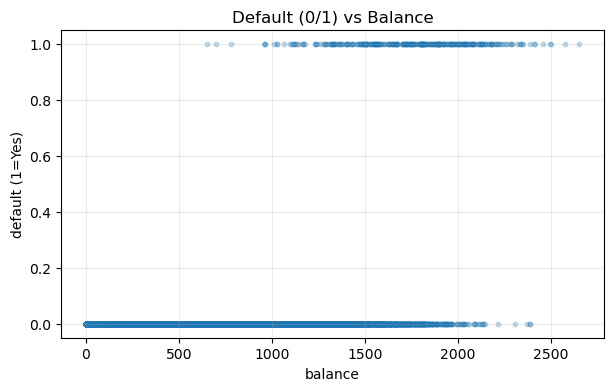

In [91]:
fig, ax = plt.subplots(figsize=(7, 4))
ax.scatter(x, y, s=10, alpha=0.25)
ax.set_title("Default (0/1) vs Balance")
ax.set_xlabel("balance")
ax.set_ylabel("default (1=Yes)")
ax.grid(True, alpha=0.25)
plt.show()

La línea que utilizaremos para predecir la probabilidad es:

$$ p(x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x)}} $$

Para nuestro ejemplo de pagos y balance:

$$ P(\text{default}=1|\text{balance}) = \frac{1}{1 + e^{-(\beta_0 + \beta_1  \text{balance})}} $$

Buscamos maximizar la probabilidad de que el modelo tome decisiones correctas. Es decir, que cuando `default` fue verdadero, que la predicción sea 100%, y que cuando `default` fue falso que la predicción sea 0%.

$$ \Pi_{i:y_i=1} p(x_i) \Pi_{i':y_{i'}} (1-p(x_{i'})) $$

La función de costo ya simplificada es la siguiente:

$$ J(\vec{\beta}) = -  \sum_{i=1}^n{[y_i \ln{(\hat{p}(x_i))} + (1-y_i)\ln{(1 - \hat{p}(x_i))}]}$$

Utiliza la clase `LogisticRegression` del módulo `linear_model` de la librería `sklearn` para estimar los parámetros del modelo.

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
X = x.to_numpy().reshape(-1, 1)

In [83]:
logit = LogisticRegression(solver='lbfgs', max_iter=1000).fit(X, y)

Muchos aspectos de la regresión logística son similares a la regresión lineal. Podemos medir la precisión de nuestros estimados calculando sus errores estándar. El objetivo de calcular estos errores es asegurar que hay una relación estadísticamente significativa entre el factor y la variable de respuesta.

Los errores estándar se obtienen con el siguiente procedimiento:

1. Calcula las predicciones utilizando los $\beta_0$ y $\beta_1$ encontrados.

In [129]:
beta0, beta1 = float(logit.intercept_), float(logit.coef_[0, 0])
beta0, beta1

/var/folders/14/1cbq2r590tgfwh0_zmgwzqs00000gn/T/ipykernel_63910/2644572291.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  beta0, beta1 = float(logit.intercept_), float(logit.coef_[0, 0])


(-10.651328236144845, 0.005498915546890767)

In [131]:
z = beta0 + beta1 * X.ravel()
z

array([-6.63972365, -6.15772219, -4.74797205, ..., -6.00247911,
       -2.02347996, -9.54647412])

In [133]:
import numpy as np
p_hat = 1 / (1 + np.exp(-z))
p_hat

array([1.30568146e-03, 2.11259754e-03, 8.59474814e-03, ...,
       2.46651596e-03, 1.16759635e-01, 7.14476480e-05])

2. Idealmente la probabilidad debería ser 100% o 0%. Si alguna predicción no fue absoluta significa que hay incertidumbre. Calcula $p(1-p)$ para todas tus predicciones.

In [123]:
w = p_hat * (1 - p_hat)

In [125]:
w[:10]

array([1.30397665e-03, 2.10813447e-03, 8.52087844e-03, 4.34248798e-04,
       1.77380208e-03, 3.69043612e-03, 2.20654372e-03, 2.01211203e-03,
       1.36416417e-02, 2.36682617e-05])

In [127]:
w.mean()

0.021720475946479394

3. Crea una matriz vacía y llena la diagonal con las probabilidades encontradas.

`V = np.diagflat(*p(1-p)*)`

In [135]:
V = np.diagflat(w)

In [137]:
V.shape

(10000, 10000)

In [139]:
V

array([[1.30397665e-03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.10813447e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 8.52087844e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.46043226e-03, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.03126823e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 7.14425432e-05]])

4. Calcula la matriz de covarianza. (Dado que X es la matriz que contiene todos los factores)

`cov = np.linalg.inv(X.T @ V @ X)`

In [141]:
X = np.column_stack([np.ones_like(x, dtype=float), x.values.astype(float)])

In [143]:
cov = np.linalg.inv(X.T @ V @ X)

In [145]:
cov

array([[ 1.30442757e-01, -7.81757265e-05],
       [-7.81757265e-05,  4.85656561e-08]])

5. Los valores en la diagonal de la matriz de covarianza corresponden a la varianza de los factores. Utiliza los valores de la diagonal para calcular el error estándar.

`se = np.sqrt(np.diag(cov))`

In [147]:
se = np.sqrt(np.diag(cov))

In [149]:
print(f"SE(beta0) = {se[0]:.6f}")
print(f"SE(beta1) = {se[1]:.6f}")

SE(beta0) = 0.361169
SE(beta1) = 0.000220


In [151]:
se

array([3.61168600e-01, 2.20376169e-04])

Ahora, revisemos si los estimados de nuestros coeficientes demuestran que hay una relación significativa entre los factores y la respuesta.

Calculamos el estadístico *z*

$$ z_j = \frac{\hat{\beta_j}}{\text{SE}(\hat{\beta_j})} $$

In [155]:
z0 = beta0 / se[0]

In [157]:
z1 = beta1 / se[1]

In [159]:
z0, z1

(-29.49129089446439, 24.952405517879996)

Utilizamos el estadístico *z* para encontrar el *p-value*.

`from scipy.stats import norm`

`p_value = 2 * (1 - norm.cdf(abs(z_statistic)))`

In [161]:
from scipy.stats import norm

In [163]:
p0 = 2 * (1 - norm.cdf(abs(z0)))
p1 = 2 * (1 - norm.cdf(abs(z1)))

In [165]:
print(f"z(beta0)={z0:.3f}, p={p0:.3e} | z(beta1)={z1:.3f}, p={p1:.3e}")

z(beta0)=-29.491, p=0.000e+00 | z(beta1)=24.952, p=0.000e+00


¿Es significativa la relación de los factores con la variable de respuesta?

Sí. Ambos coeficientes son altamente significativos: z(b0) = 29.49 y z(b1) = 24.95 con p≈0.000 (< 0.001).

Rechazamos la hipotesis nula. Existe relación estadísticamente significativa entre balance y la probabilidad de default.

Además, beta1>0 indica que a mayor balance, mayor probabilidad de impago.

Repite el procedimiento con el factor `student`. 
1. Transforma el factor de {"Yes", "No"} a {1, 0}.
2. Estima los coeficientes. 
3. Calcula el error estándar de tus estimaciones.
   1. Usa tu modelo para encontrar $\hat{p}(X)$
   2. Calcula el error $p(1-p)$
   3. Calcula la matriz de covarianza
   4. Extrae el error estándar
5. Argumenta si los factores son significativos utilizando el *p-value*.
   1. Utiliza el error estándar para calcular el estadístico *z*
   2. Calcula el *p-value*
   3. ¿Son significativos?


In [170]:
x_stu = (df["student"] == "Yes").astype(int)
y     = (df["default"] == "Yes").astype(int)

In [172]:
from sklearn.linear_model import LogisticRegression

logit_stu = LogisticRegression(fit_intercept=True, solver="liblinear")
logit_stu.fit(x_stu.values.reshape(-1, 1), y)

beta0_stu = float(logit_stu.intercept_)
beta1_stu = float(logit_stu.coef_.ravel()[0])
beta0_stu, beta1_stu

/var/folders/14/1cbq2r590tgfwh0_zmgwzqs00000gn/T/ipykernel_63910/2473252596.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  beta0_stu = float(logit_stu.intercept_)


(-3.4849624055245427, 0.38256902529040543)

In [174]:
import numpy as np

X_stu     = np.column_stack([np.ones(len(x_stu)), x_stu.values])
p_hat_stu = logit_stu.predict_proba(x_stu.values.reshape(-1,1))[:, 1]
w_stu     = p_hat_stu * (1 - p_hat_stu)
V_stu     = np.diagflat(w_stu)
cov_stu   = np.linalg.inv(X_stu.T @ V_stu @ X_stu)
se_stu    = np.sqrt(np.diag(cov_stu))
se_stu

array([0.07007837, 0.11473327])

In [176]:
from scipy.stats import norm

z0_stu = beta0_stu / se_stu[0]
z1_stu = beta1_stu / se_stu[1]
p0_stu = 2 * (1 - norm.cdf(abs(z0_stu)))
p1_stu = 2 * (1 - norm.cdf(abs(z1_stu)))

print(f"Coeficientes: beta0={beta0_stu:.4f}, beta1={beta1_stu:.4f}")
print(f"Errores estándar: se0={se_stu[0]:.4f}, se1={se_stu[1]:.4f}")
print(f"z(beta0)={z0_stu:.3f}, p={p0_stu:.3e} | z(beta1)={z1_stu:.3f}, p={p1_stu:.3e}")

Coeficientes: beta0=-3.4850, beta1=0.3826
Errores estándar: se0=0.0701, se1=0.1147
z(beta0)=-49.730, p=0.000e+00 | z(beta1)=3.334, p=8.548e-04


Usando p-values:
p0 ≈ 0.0000 y p1 = 8.55e-04 (< 0.05). Con estos valores rechazamos H0 para el coeficiente de student. El factor es significativo.

Cálculo de z con errores estándar:
se0 = 0.0701, se1 = 0.1147.
z0 = beta0 / se0 = −3.4850 / 0.0701 = −49.73.
z1 = beta1 / se1 = 0.3826 / 0.1147 = 3.33.

Cálculo de p-values a partir de z:
p0 = 2 * (1 − Phi(|z0|)) ≈ 0.0000.
p1 = 2 * (1 − Phi(|z1|)) = 8.55e-04.

¿Son significativos?
Sí. El coeficiente de student es significativo y positivo (beta1 = 0.3826). La razón de momios exp(beta1) ≈ 1.47, lo que sugiere ~47% más odds de caer en default para estudiantes que para no estudiantes en este modelo simple.

## Regresión logística múltiple

Considera ahora el caso de múltiples factores. Intentemos predecir si la persona dejará de pagar su crédito utilizando toda la información que tenemos disponible. I.e.

$$ P(\text{default}=1|\text{balance}, \text{income}, \text{student}) = \frac{1}{1 + e^{-(\beta_0 + \beta_1  \text{balance} + \beta_2 \text{income} + \beta_3 \text{student})}} $$

1. Utiliza `LogisticRegression` para estimar los coeficientes.
2. Calcula el error estándar de tus estimaciones.
3. Argumenta si los factores son significativos utilizando el *p-value*. 

In [179]:
from sklearn.linear_model import LogisticRegression
import numpy as np

y = (df["default"] == "Yes").astype(int).values
X = np.column_stack([
    df["balance"].values,
    df["income"].values,
    (df["student"] == "Yes").astype(int).values
])

logit3 = LogisticRegression(fit_intercept=True, C=1e6, solver="lbfgs", max_iter=1000)
logit3.fit(X, y)

beta = np.r_[float(logit3.intercept_.ravel()[0]), logit3.coef_.ravel()]
print("betas:", beta)

betas: [-1.08690452e+01  5.73650527e-03  3.03345082e-06 -6.46775777e-01]


In [181]:
p_hat = logit3.predict_proba(X)[:, 1]

X_design = np.column_stack([np.ones(len(X)), X])

W = np.diagflat(p_hat * (1 - p_hat))
cov = np.linalg.inv(X_design.T @ W @ X_design)

se = np.sqrt(np.diag(cov))
print("se:", se)

se: [4.92272651e-01 2.31904426e-04 8.20276563e-06 2.36256926e-01]


In [183]:
from scipy.stats import norm

z = beta / se
pvals = 2 * (1 - norm.cdf(np.abs(z)))

nombres = ["intercepto", "balance", "income", "student"]
for name, b, s, zz, pv in zip(nombres, beta, se, z, pvals):
    print(f"{name:>10s}: beta={b: .4f}, se={s: .4f}, z={zz: .3f}, p={pv: .3e}")

intercepto: beta=-10.8690, se= 0.4923, z=-22.079, p= 0.000e+00
   balance: beta= 0.0057, se= 0.0002, z= 24.737, p= 0.000e+00
    income: beta= 0.0000, se= 0.0000, z= 0.370, p= 7.115e-01
   student: beta=-0.6468, se= 0.2363, z=-2.738, p= 6.189e-03


balance: p ≈ 0.0000 → sí es significativo. El coeficiente es positivo (≈ 0.0057), así que a mayor balance, mayor probabilidad de default, manteniendo todo lo demás constante.

income: p ≈ 0.7115 → no es significativo. Con estos datos, el ingreso no aporta evidencia para predecir el default una vez que consideramos los otros factores.

student: p ≈ 0.0062 → sí es significativo. El coeficiente es negativo (≈ −0.6468), por lo que ser estudiante se asocia con menor probabilidad de default, manteniendo todo lo demás constante.

¿Cómo sabemos qué tan bueno es el modelo? Hay cuatro posibles casos para un problema de clasificación simple:
- Era sí y se predijo sí. (Verdadero positivo **TP**)
- Era sí y se predijo no. (Falso negativo **FN**)
- Era no y se predijo sí. (Falso positivo **FP**)
- Era no y se predijo no. (Verdadero negativo **TN**)

De esos cuatro casos hay dos donde el modelo es correcto y dos donde el modelo no es correcto.

![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*IuymDnZpRlkat0qejE26Nw.png)

1. Menciona dos ejemplos donde consideres que un falso positivo sea un peor resultado que un falso negativo.

2. Menciona dos ejemplos donde consideres que un falso negativo sea un peor resultado que un falso positivo.

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3